## Documentation

To read more about field data types, visit the [docs](https://www.elastic.co/guide/en/elasticsearch/reference/current/mapping-types.html).

![field_data_types_docs](../images/field_data_types_docs.png)

> Note: datatype don't enforce type safety, but provide enhaced search capablity if the inserted data is according to mentioned datatype.

## Connect to ElasticSearch

In [1]:
from pprint import pprint
from elasticsearch import Elasticsearch

es = Elasticsearch('http://localhost:9200')
client_info = es.info()
print('Connected to Elasticsearch!')
pprint(client_info.body)

Connected to Elasticsearch!
{'cluster_name': 'es-docker-cluster',
 'cluster_uuid': '68vsKryIR7Ss49bLh7mz5Q',
 'name': 'es01',
 'tagline': 'You Know, for Search',
 'version': {'build_date': '2025-12-16T10:09:08.849001802Z',
             'build_flavor': 'default',
             'build_hash': 'd8972a71dbbd64ff17f2f4dba9ca2c3fe09fb100',
             'build_snapshot': False,
             'build_type': 'docker',
             'lucene_version': '10.3.2',
             'minimum_index_compatibility_version': '8.0.0',
             'minimum_wire_compatibility_version': '8.19.0',
             'number': '9.2.3'}}


## 1. Common types

### 1.1 Binary

> Note: DO NOT STORE BINARY FILES i.e img, pdf, etc in elastic search, has will store huge base64 encode characters. It will not provide any value, as they are not searchable in elastic search.

> You can use `_source` to get only the document's binary source without metadata. Only applicable for binary stored objects
```sh
GET /binary_index/_doc/9T3xapsBX61qEH3bNUjp    // GET /index_name/_doc/_id  --> with meta

GET /binary_index/_source/9T3xapsBX61qEH3bNUjp  // GET /index_name/_source/_id  --> direct binary url
```

In [2]:
es.indices.delete(index='binary_index', ignore_unavailable=True)
es.indices.create(
    index='binary_index',
    mappings={
        "properties": {
            "image_data": {
                "type": "binary"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'binary_index'})

In [3]:
import base64

image_path = "../images/field_data_types_docs.png"
with open(image_path, "rb") as image_file:
    image_bytes = image_file.read()
    image_base64 = base64.b64encode(image_bytes).decode("utf-8")

image_base64[:100]

'iVBORw0KGgoAAAANSUhEUgAAB4AAAAJTCAYAAADpMAvgAAAABHNCSVQICAgIfAhkiAAAABl0RVh0U29mdHdhcmUAZ25vbWUtc2Ny'

In [4]:
document = {
    "image_data": image_base64
}
response = es.index(index='binary_index', body=document)
response

ObjectApiResponse({'_index': 'binary_index', '_id': '9T3xapsBX61qEH3bNUjp', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

### 1.2 Others

In [5]:
es.indices.delete(index='other_common_data_types_index',
                  ignore_unavailable=True)
es.indices.create(
    index='other_common_data_types_index',
    mappings={
        "properties": {
            "book_reference": {
                "type": "keyword"
            },
            "price": {
                "type": "float"
            },
            "publish_date": {
                "type": "date"
            },
            "is_available": {
                "type": "boolean"
            },
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'other_common_data_types_index'})

In [6]:
document = {
    "book_reference": "978-1617294433",
    "price": 44.99,
    "publish_date": "2021-06-30",
    "is_available": True
}
response = es.index(index='other_common_data_types_index', body=document)
response

ObjectApiResponse({'_index': 'other_common_data_types_index', '_id': '9j39apsBX61qEH3bnkgn', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

## 2. Object types

### 2.1 Object

In [7]:
es.indices.delete(index='object_index', ignore_unavailable=True)
es.indices.create(
    index='object_index',
    mappings={
        "properties": {
            "author": {
                "properties": {
                    "first_name": {
                        "type": "text"
                    },
                    "last_name": {
                        "type": "text"
                    }
                }
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'object_index'})

In [11]:
document = {
    "author": {
        "name": {
            "first_name": "Imad",
            "last_name": "Saddik"
        }
    }
}
response = es.index(index='object_index', body=document)
response

ObjectApiResponse({'_index': 'object_index', '_id': '-T0Ka5sBX61qEH3bgkiM', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

### 2.2 Flattened object

> Relationship loss happens when in searching the document with queries, `_search` or `_doc` will not flatten the data, it stores the inserted data with provided structure.

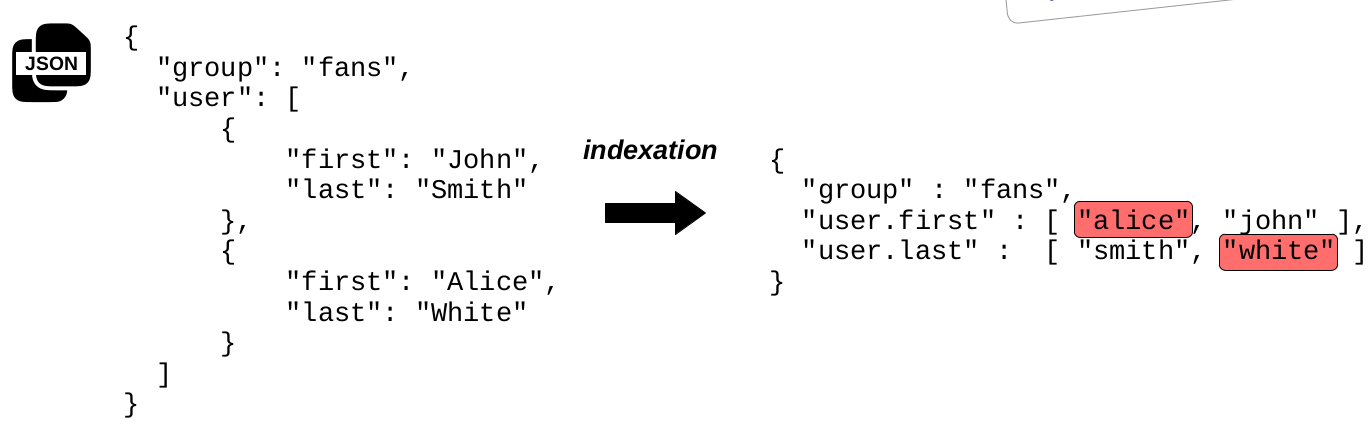

In [9]:
es.indices.delete(index='flattened_object_index', ignore_unavailable=True)
es.indices.create(
    index='flattened_object_index',
    mappings={
        "properties": {
            "author": {
                "type": "flattened"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'flattened_object_index'})

In [12]:
document = {
    "author": {
        "name": {
            "first_name": "Imad",
            "last_name": "Saddik"
        }
    }
}
response = es.index(index='flattened_object_index', body=document)
response

ObjectApiResponse({'_index': 'flattened_object_index', '_id': '-j0Ka5sBX61qEH3b80h1', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

### 2.3 Nested object

In [13]:
es.indices.delete(index='nested_object_index', ignore_unavailable=True)
es.indices.create(
    index='nested_object_index',
    mappings={
        "properties": {
            "user": {
                "type": "nested",
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'nested_object_index'})

In [14]:
documents = [
    {
        "first": "John",
        "last": "Smith"
    },
    {
        "first": "Imad",
        "last": "Saddik"
    }
]
response = es.index(index='nested_object_index', body={"user": documents})
response

ObjectApiResponse({'_index': 'nested_object_index', '_id': 'I4H3SZIBSxBkDZnVVakk', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

## 3. Text search types

### 3.1 Text

In [13]:
es.indices.delete(index='text_index', ignore_unavailable=True)
es.indices.create(
    index='text_index',
    mappings={
        "properties": {
            "email_body": {
                "type": "text"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'text_index'})

In [14]:
document = {
    "email_body": "Hello, this is a test email."
}
response = es.index(index='text_index', body=document)
response

ObjectApiResponse({'_index': 'text_index', '_id': '-z0Ta5sBX61qEH3be0jG', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

### 3.2 Completion

In [15]:
es.indices.delete(index='text_completion_index', ignore_unavailable=True)
es.indices.create(
    index='text_completion_index',
    mappings={
        "properties": {
            "suggest": {
                "type": "completion"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'text_completion_index'})

In [16]:
document_1 = {
    "suggest": {
        "input": ["Mars", "Planet"]
    }
}

document_2 = {
    "suggest": {
        "input": ["Andromeda", "Galaxy"]
    }
}

es.index(index='text_completion_index', body=document_1)
es.index(index='text_completion_index', body=document_2)

ObjectApiResponse({'_index': 'text_completion_index', '_id': '_T0Ta5sBX61qEH3b10hv', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

## 4. Spatial data types

### 4.1 Geo point

In [17]:
es.indices.delete(index='geo_point_index', ignore_unavailable=True)
es.indices.create(
    index='geo_point_index',
    mappings={
        "properties": {
            "location": {
                "type": "geo_point"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'geo_point_index'})

In [20]:
document = {
    "text": "Geopoint as an object using GeoJSON format",
    "location": {
        "type": "Point",
        "coordinates": [
            -71.34,
            41.12
        ]
    }
}
response = es.index(index='geo_point_index', body=document)
response

ObjectApiResponse({'_index': 'geo_point_index', '_id': 'J4H8SZIBSxBkDZnV7qns', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

### 4.2 Geo shape

In [18]:
es.indices.delete(index='geo_shape_index', ignore_unavailable=True)
es.indices.create(
    index='geo_shape_index',
    mappings={
        "properties": {
            "location": {
                "type": "geo_shape"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'geo_shape_index'})

In [22]:
document_1 = {
    "location": {
        "type": "LineString",
        "coordinates": [
            [
                -77.03653,
                38.897676
            ],
            [
                -77.009051,
                38.889939
            ]
        ]
    }
}
document_2 = {
    "location": {
        "type": "Polygon",
        "coordinates": [
            [
                [100, 0],
                [101, 0],
                [101, 1],
                [100, 1],
                [100, 0],
            ],
            [
                [100.2, 0.2],
                [100.8, 0.2],
                [100.8, 0.8],
                [100.2, 0.8],
                [100.2, 0.2],
            ]
        ]
    }
}

es.index(index='geo_shape_index', body=document_1)
es.index(index='geo_shape_index', body=document_2)

ObjectApiResponse({'_index': 'geo_shape_index', '_id': 'KYH9SZIBSxBkDZnV6alH', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

### 4.3 Point

In [19]:
es.indices.delete(index='point_index', ignore_unavailable=True)
es.indices.create(
    index='point_index',
    mappings={
        "properties": {
            "location": {
                "type": "point"
            }
        }
    }
)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'point_index'})

In [20]:
document = {
    "location": {
        "type": "Point",
        "coordinates": [
            -71.34,
            41.12
        ]
    }
}

response = es.index(index='point_index', body=document)
response

ObjectApiResponse({'_index': 'point_index', '_id': '_j0Ua5sBX61qEH3bJkhr', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})